## Structure

- Introduction
- What is Stationarity
    - Definition
    - Mathematical Background
- Usefulness and Applications
- Detecting stationarity
- Making time series stationary
- Hands-on example (?)
- Conclusions / Summary

---

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
# from statsmodels.tsa.tsatools import lagmat
import seaborn as sns
import matplotlib.pyplot as plt

In [71]:

df = pd.read_csv(r'C:\Users\douglas.sgrott_indic\Documents\Study\time-series-studies\data\temperatures\city_temperature.csv')


C:\Users\douglas.sgrott_indic\AppData\Local\Temp\ipykernel_29888\2490356914.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\douglas.sgrott_indic\Documents\Study\time-series-studies\data\temperatures\city_temperature.csv')


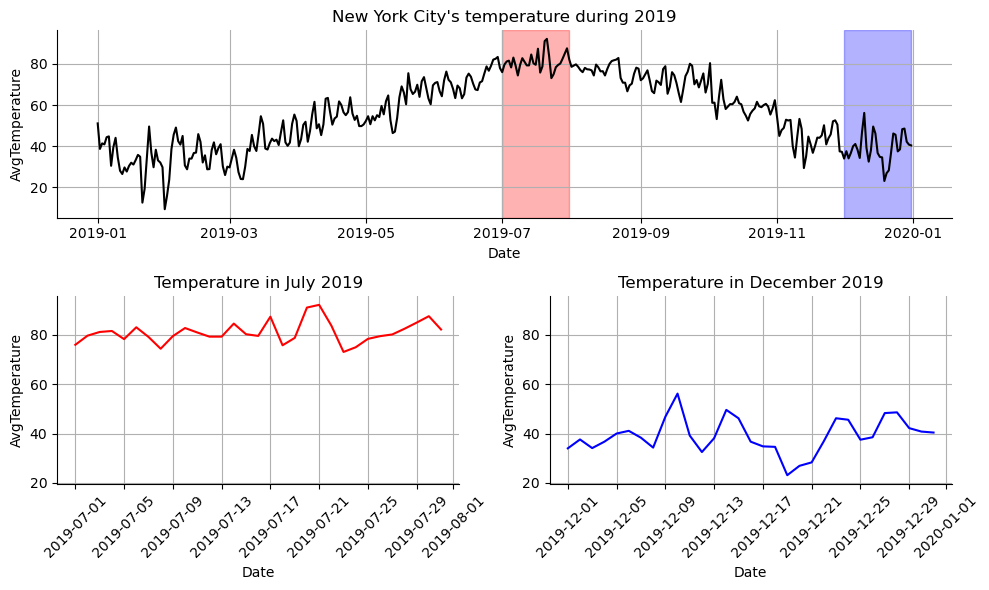

In [124]:
from statsmodels.tsa.stattools import adfuller


df = df[(df['Year'] > 2018) & (df['Year'] <= 2019)]
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

nyc_df = df[(df['City'] == 'New York City')]
nyc_summer_df = df[(df['City'] == 'New York City') & (df['Month'].isin([7]))]
nyc_winter_df = df[(df['City'] == 'New York City') & (df['Month'].isin([12]))]
# rjc_df = df[(df['City'] == 'Rio de Janeiro')]


# res_year = adfuller(nyc_df['AvgTemperature'])
# res_winter = adfuller(nyc_winter_df['AvgTemperature'])
# res_summer = adfuller(nyc_summer_df['AvgTemperature'])

# res_dict = {
#     'is_year_stationary': res_year[1] < 0.05,
#     'is_winter_stationary': res_winter[1] < 0.05,
#     'is_summer_stationary': res_summer[1] < 0.05,
#     'year_p_value': res_year[1],
#     'winter_p_value': res_winter[1],
#     'summer_p_value': res_summer[1]
# }
# print(f"Year ADF Statistic: {res_year[0]}, p-value: {res_year[1]}")
# print(f"Winter ADF Statistic: {res_winter[0]}, p-value: {res_winter[1]}")
# print(f"Summer ADF Statistic: {res_summer[0]}, p-value: {res_summer[1]}")

# fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharex=True, sharey=True)
# sns.lineplot(data=nyc_df, x='Date', y='AvgTemperature', hue='City', ax=axes[0])
# sns.lineplot(data=rjc_df, x='Date', y='AvgTemperature', hue='City', ax=axes[1])

# axes[0].set_ylim(10, 100)

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Create the figure
fig = plt.figure(figsize=(10, 6))

# Define GridSpec: 2 rows, 2 columns
gs = gridspec.GridSpec(2, 2, height_ratios=[1, 1])

# First subplot: spans both columns (row 0, columns 0 to 2)
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1], sharey=ax2)

sns.lineplot(data=nyc_df, x='Date', y='AvgTemperature', color='black', ax=ax1)
sns.lineplot(data=nyc_summer_df, x='Date', y='AvgTemperature', color='red', ax=ax2)
sns.lineplot(data=nyc_winter_df, x='Date', y='AvgTemperature', color='blue', ax=ax3)

ax1.axvspan(pd.to_datetime('2019-07-01'), pd.to_datetime('2019-07-31'), color='red', alpha=0.3)
ax1.axvspan(pd.to_datetime('2019-12-01'), pd.to_datetime('2019-12-31'), color='blue', alpha=0.3)

# Optional: Titles or placeholder content
ax1.set_title("New York City's temperature during 2019")
ax2.set_title("Temperature in July 2019")
ax3.set_title("Temperature in December 2019")

# Add grid
ax1.grid(True)
ax2.grid(True)
ax3.grid(True)

# Remove top and right spines
sns.despine(ax=ax1)
sns.despine(ax=ax2)
sns.despine(ax=ax3)

# Rotate ax2 and ax3 x-axis labels
ax2.tick_params(axis='x', rotation=45)
ax3.tick_params(axis='x', rotation=45)

# Layout adjustment
plt.tight_layout()
plt.show()


In [ ]:
from statsmodels.tsa.stattools import adfuller

res_year = adfuller(nyc_df['AvgTemperature'])
res_winter = adfuller(nyc_winter_df['AvgTemperature'])
res_summer = adfuller(nyc_summer_df['AvgTemperature'])

print(f"Year ADF Statistic: {res_year[0]:.3f}, p-value: {res_year[1]:.3f}, Critical Values: {res_winter[4]}")
print(f"Winter ADF Statistic: {res_winter[0]:.3f}, p-value: {res_winter[1]:.3f}, Critical Values: {res_winter[4]}")
print(f"Summer ADF Statistic: {res_summer[0]:.3f}, p-value: {res_summer[1]:.3f}, Critical Values: {res_winter[4]}")

Year ADF Statistic: -1.069, p-value: 0.727, Critical Values: {'1%': -3.6889256286443146, '5%': -2.9719894897959187, '10%': -2.6252957653061224}
Winter ADF Statistic: -2.260, p-value: 0.185, Critical Values: {'1%': -3.6889256286443146, '5%': -2.9719894897959187, '10%': -2.6252957653061224}
Summer ADF Statistic: -4.701, p-value: 0.000, Critical Values: {'1%': -3.6889256286443146, '5%': -2.9719894897959187, '10%': -2.6252957653061224}


<Axes: >

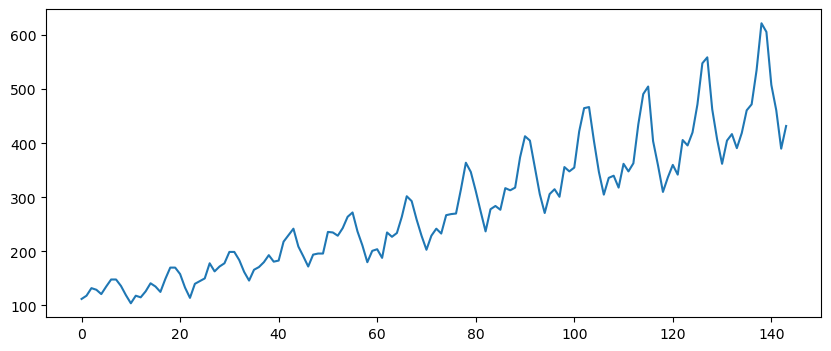

In [51]:

flights = sns.load_dataset('flights')
month_map = {
    'Jan': '01', 'Feb': '02', 'Mar': '03', 'Apr': '04', 'May': '05', 'Jun': '06',
    'Jul': '07', 'Aug': '08', 'Sep': '09', 'Oct': '10', 'Nov': '11', 'Dec': '12'
}
flights['month_str'] = flights['month'].map(month_map).astype(str)
flights['year_str'] = flights['year'].astype(str)
flights['date'] = flights['year_str'] + '-' + flights['month_str'] + '-01'
flights['date'] = pd.to_datetime(flights['date'])
flights = flights[['date', 'passengers']]
flights['passengers'].plot(figsize=(10,4))


ADF Statistic: -9.21, p-value: 0.00


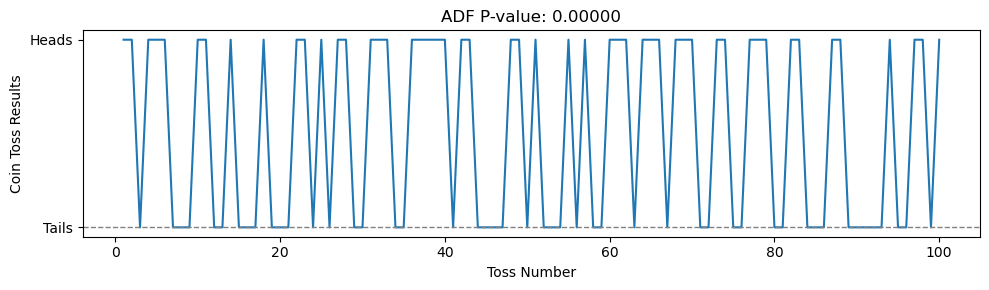

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Step 1: Simulate 100 coin tosses (0 = tails, 1 = heads)
n_tosses = 100
tosses = np.random.randint(0, 2, size=n_tosses)

res = adfuller(tosses)
print(f"ADF Statistic: {res[0]:.2f}, p-value: {res[1]:.2f}")

# Step 4: Plot
plt.figure(figsize=(10, 3))
plt.plot(range(1, n_tosses + 1), tosses)
# plt.plot(range(1, n_tosses + 1), tosses, marker='o', linestyle='-', color='darkgreen')
plt.title('ADF P-value: {:.5f}'.format(res[1]))
plt.xlabel('Toss Number')
plt.ylabel('Coin Toss Results')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.yticks([0, 1], ['Tails', 'Heads'])

# plt.grid(True)
plt.tight_layout()
plt.show()






In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import adfuller

import matplotlib.pyplot as plt
from matplotlib import rcParams
from cycler import cycler

rcParams['figure.figsize'] = 18, 5
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['axes.prop_cycle'] = cycler(color=['#365977'])
rcParams['lines.linewidth'] = 2.5


# Load
df = pd.read_csv('data/airline-passengers.csv', index_col='Month', parse_dates=True)

# Visualize
plt.title('Airline Passengers dataset', size=20)
plt.plot(df);

In [ ]:
# 📌 Section 1: Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

## Introduction

This post is meant to provide a concise but comprehensive overview of the concept of stationarity and of the different types of stationarity defined in academic literature dealing with time series analysis.

Future posts will aim to provide similarly concise overviews of detection of non-stationarity in time series data and of the different ways to transform non-stationary time series into stationary ones.¹

In this article, we will discuss:

- What is Stationarity
- Types of Stationarity
- Why is Stationarity Important?
- What if the data is not Stationary?
- Detecting Stationarity
- Making a Series Stationary
- Conclusions / Summary

### Key take aways:

- [ADAPT] Stationarity describes the concept that the statistical features of a time series do not change over time.
- Some forecasting models requires that the time series they're being modeled on to be stationary.

(from Stationarity in time series analysis)


## What is Stationarity?

There are different nuances to be understood when talking about stationarity. Firstly, there isn't just one type of stationarity, it is intrinsically linked to stochastic processes, and the statistical tests that detect stationarity actually tests for unit roots. Below, we will explain what all this is about:

### Simple Definition

In simple terms, stationarity means that certain statistical properties of the process are constant over time [R1]. This means that if you take consecutive samples of the data with equal length from a time series, the following properties should be the same:

- Mean (average value)
- Variance (spread or variability)
- Covariance structure (how values relate to each other over time)

This is the most used and practical definition of stationarity, also called the weak stationarity, and is probably all you need to know for your analysis. However, the real world is complex, and thus, different notions and types of stationarity have been suggested in the literature over the years.

[R1:check] R. J. Hyndman, G Athanasopoulos 2021, Forecasting principles and practice, 3rd edition

### Strong of Weak Stationarity?

There are two main types of stationarity definitions:
There are two levels of rigourous

- **Wide or Weak Stationarity**: Mean and variance are constant, and the covariance structure depends only on lag, not time. 
- **Strong or Strict Stationarity**: Besides the properties of the weak stationarity, here the data distribution is also constant across time. In other words, it is shift-invariant in time.

To better illustrate the difference between weak and strong stationarity, consider the following textbook example:

Consider the temperature of New York City:

- We know that even though it isn't constant, the changes in temperature throughout the days are somewhat expected (a low mean anomaly with stable variance)
- We also expect that the temperature from one day might be more similar to the day before than the week or month before (which can mean that the autocorrelation is more lag oriented, instead of time oriented).

Thus, we expect a monthly data of temperatures to be roughly weak stationary. However, when we increase the data span across several months, the seasons add trends that make our data clearly non-stationary. So, if you measure the temperature in July or December, even though separately they can be weak-stationary, the time shift can make a hot summer day turn into a chilling winter night. Since it isn't time-invariant, it isn't strongly stationary.

Now, consider a coin toss, where the coin can either land on heads (value of 1) or tails (value of 0) with equal chance. If your toss the coin N times, you'll have a time series of N points. From this, we can expect that:

- Since the results are random, we expect the mean (0.5) and variance (0.25) of the time series to be constant.
- One coin toss result does not depend on the prior coin toss (no autocorrelation)
- Time shouldn't influence the results. If you toss N coins during the winter, it shouldn't have statistical differences from N coin tosses during the summer (time invariance)
- Not only that, but we also know that the data comes from the same distribution (a Binomial with p=0.5)

So, a sequence of coin tosses should show strong stationarity.

### Time series and stochastic processes

Since we're being somewhat formal, let's get something out of the way first:

Actually, there is no such thing as a stationary time series.

In fact, stationarity is a property of a stochastic process, not of a single time series realization. When we say something along the lines of "This time series is stationary", what we actually mean to say is "We are assuming that this finite time series is a suficiently faithful representation of it's underlying stochastic process, which is stationary".

A time series is a single observed sequence of data points. But a stochastic process is a probabilistic model that defines the distribution of all possible sequences (realizations) that could be generated under the same rules.

This explains why the strong stationarity is so rare in the real world's raw data. Many real processes depends on multiple variables. The weather on humidity, cyclical global patterns (El Nino, El Nina), ammount of CO2 on the atmosphere, the distance from the planet of the sun, the planet's tilt, among others. Even financial data can depend on tax rates, monetary incentives, demand and supply, public policies, etc. But a true random coin toss, it depends mostly on luck.

This is important because some times we just want to model the time series and make predictions. Other times, we analyze and model our data in order to better understand the underlying stochastic process.

### What are Unit Roots (and why we're talking about them)?

In simple terms, a unit root represents a stochastic trend in a time series. Its presence introduces persistence, meaning shocks have long-lasting effects, which poses challenges for modeling and forecasting.

And this is theoretically important because, as will be shown soon, there are statistical tests that can be employed to detect the existence of unit roots, that is, non-stationary.

And where does the strange name come from? To answer that, consider the first-order autoregressive model:

$$
y_t = \rho y_{t-1} + \epsilon_t
$$

Using the lag operator $L$, where $L y_t = y_{t-1}$, we can rewrite it as follows:

$$
(1 - \rho L)y_t = \epsilon_t
$$

This expression is called the characteristic equation of the model. Now comes the key part:

To determine stationarity, we look at the roots of the characteristic equation:

$$
1 - \rho z = 0 \quad \Rightarrow \quad z = \frac{1}{\rho}
$$

- If $\rho = 1$, then the root is exactly 1, hence the name "unit root".
- A unit root means the process is non-stationary.
- For stationarity, we require $|\rho| < 1$

So in summary, a "unit root" is a stochastic trend, the "root" comes from the root of the characteristic polynomial, and the "unit" refers to the root having magnitude 1. When the root equals 1, the process is non-stationary and exhibits a random walk behavior.

<br><br><br><br><br><br>

## Why is Stationarity Important?

Stationarity is a crucial concept in time series analysis because it makes the data much easier to model and predict. Here's why it's so important:

1.  **Predictability and reliability:** The properties of a stationary time series tends to make it more predictable. If these properties were constantly changing, it would be like trying to hit a moving target – any model you build for one period might be useless for the next. If the series are stationary, we can have more confidence that the patterns observed in the past will continue into the future.

2.  **Modeling Assumptions:** Many forecasting models (like ARMA, etc) are designed based on the assumption that the underlying data is stationary. Applying these models directly to non-stationary data can lead to unreliable parameters and incorrect inferences.

3.  **Avoidance of Spurious Regressions:** When two non-stationary time series are trending (even if they are completely unrelated), they can appear to be strongly correlated. This is known as spurious regression. Making the series stationary helps to remove these misleading coincidental trends, allowing you to identify genuine relationships.

4.  **Theoretical Foundation:** Much of the statistical theory underpinning time series analysis is based on the assumption of stationarity. Violating this assumption means that the standard errors, confidence intervals, and hypothesis tests associated with your model may not be valid.

For example, consider the flight dataset. We can easily infer the seasonality period just by looking at it, but to many series we can't. So, we plot its correlogram in order to try to extract meaningful information. But as can be seen from the plots below, the stationary data from the flight dataset is much easier to interpret and with much more statistical significance. This not only extends to the correlograms, but also statistical tests such as granger causality and modeling.


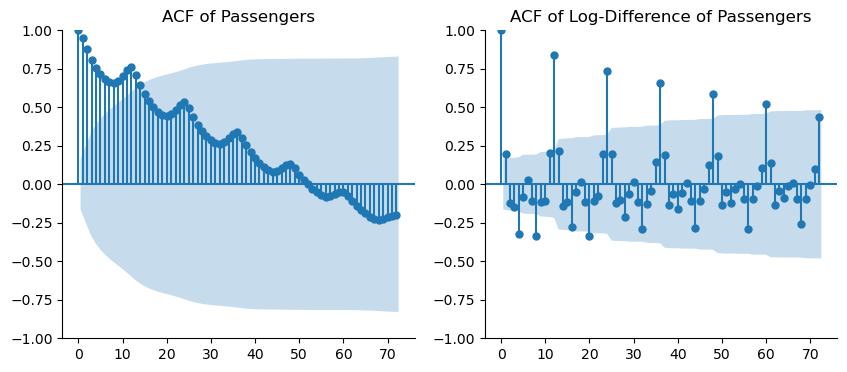

In [70]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 4))
plot_acf(flights['passengers'], lags=72, ax=axes[0]);
plot_acf(np.log(flights['passengers']).diff().dropna(), lags=72, ax=axes[1]);

axes[0].set_title('ACF of Passengers')
axes[1].set_title('ACF of Log-Difference of Passengers')
sns.despine(ax=axes[0])
sns.despine(ax=axes[1])

<br><br><br><br><br><br>

## Detecting stationarity

### Visual inspection

A visual inspection can be a quick-and-dirty method to give us a rough estimate whether a time series might be stationary, and which types of trends are in it. However, it tends to work mainly on simple series.

You can try to visually assess the stationarity of a time series by mentally dividing parts and comparing the mean, amplitude, and cycle length from each part. 

Below is an image doing this comparison, although computationaly, for the flight dataset, and we can see that both the average (possibly due to the additive trend) and the standard deviation (possibly due to the multiplicative trend) goes up with time, indicating non-stationary:

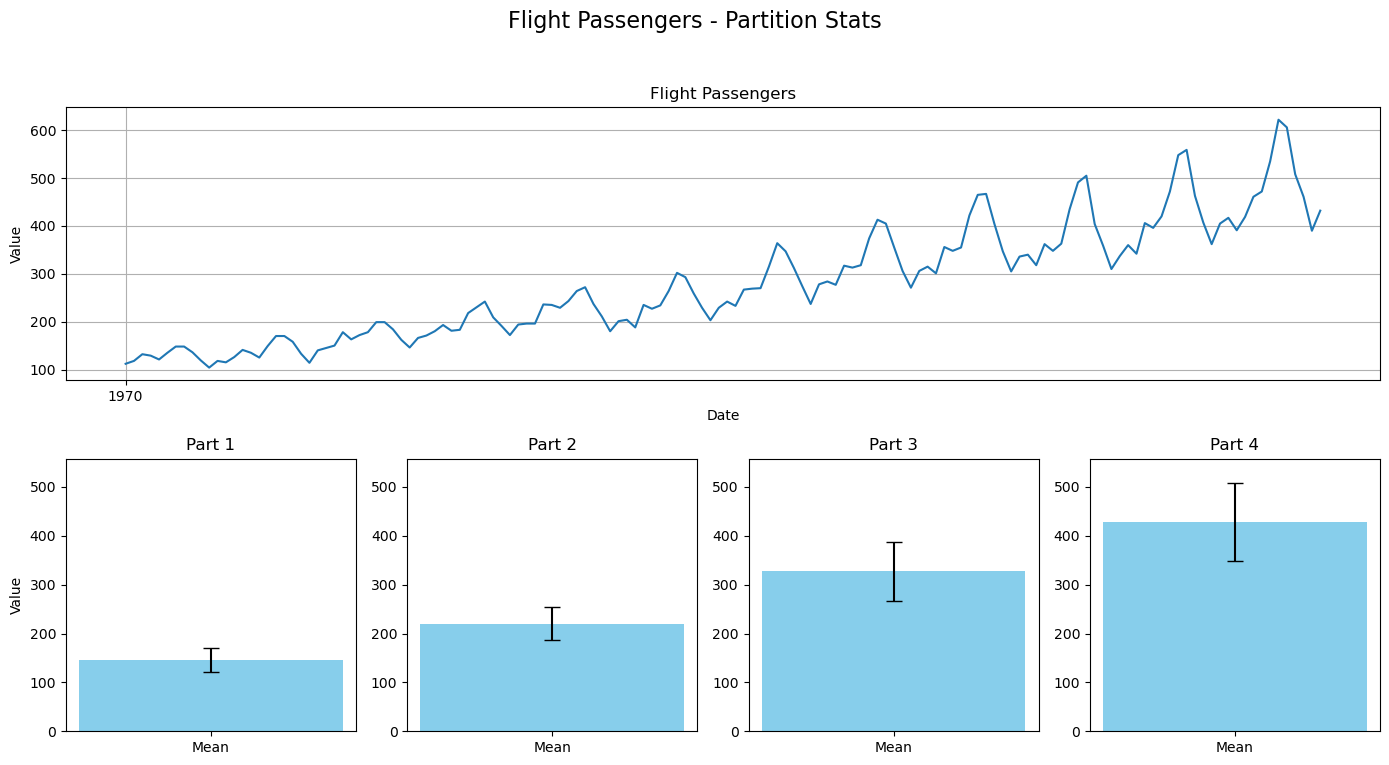

In [99]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_timeseries_with_partition_stats(data, date_col=None, value_col=None, n_parts=4, figsize=(14, 8), title=None):
    """
    Plots a time series and n_parts summary statistics (mean and std) in a single figure.

    Parameters:
    - data: pandas DataFrame or Series
    - date_col: name of the datetime column (required for DataFrame)
    - value_col: name of the numeric value column (required for DataFrame)
    - n_parts: number of equal partitions (default: 4)
    - figsize: figure size tuple (default: (14, 8))
    - title: optional title for the plot
    """

    # Handle Series input
    if isinstance(data, pd.Series):
        if isinstance(data.index, pd.DatetimeIndex):
            df = data.reset_index()
            df.columns = ['date', 'value']
        else:
            # Use numeric index as time fallback
            df = pd.DataFrame({'date': range(len(data)), 'value': data.values})
        date_col = 'date'
        value_col = 'value'
    
    elif isinstance(data, pd.DataFrame):
        if date_col is None or value_col is None:
            raise ValueError("For DataFrames, 'date_col' and 'value_col' must be specified.")
        df = data.copy()
    else:
        raise TypeError("Input must be a pandas DataFrame or Series.")

    # Ensure date column is datetime if possible, or keep numeric
    try:
        df[date_col] = pd.to_datetime(df[date_col])
    except (ValueError, TypeError):
        pass  # if it's numeric, don't force datetime

    df = df.sort_values(date_col)

    # Partition the data
    parts = []
    n = len(df)
    chunk_size = n // n_parts
    for i in range(n_parts):
        start = i * chunk_size
        end = (i + 1) * chunk_size if i < n_parts - 1 else n
        parts.append(df.iloc[start:end])

    # Compute means and stds
    means = [part[value_col].mean() for part in parts]
    stds = [part[value_col].std() for part in parts]

    # Set up the figure and gridspec
    fig = plt.figure(figsize=figsize)
    gs = fig.add_gridspec(2, n_parts)

    # Top plot: full time series
    ax0 = fig.add_subplot(gs[0, :])
    ax0.plot(df[date_col], df[value_col], label=value_col, color='tab:blue')
    ax0.set_title('Time Series Plot' if not title else title)
    ax0.set_xlabel('Time' if df[date_col].dtype != 'datetime64[ns]' else 'Date')
    ax0.set_ylabel(value_col.capitalize())
    ax0.grid(True)

    # Bottom plots: mean and std for each part
    for i in range(n_parts):
        ax = fig.add_subplot(gs[1, i])
        ax.bar(['Mean'], [means[i]], yerr=[stds[i]], capsize=6, color='skyblue')
        ax.set_title(f'Part {i+1}')
        ax.set_ylim(0, max(means) + max(stds) + 50)
        if i == 0:
            ax.set_ylabel(value_col.capitalize())

    fig.suptitle(f'{title or "Time Series"} - Partition Stats', fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


plot_timeseries_with_partition_stats(flights['passengers'], n_parts=4, title="Flight Passengers")



### Statistical Tests

Statistical tests provides a more quantitative way to determine if the data is indeed stationary. As previously mentioned, these methods tests for the presence ot a unit root in the series. There are multiple tests, but we will focus on the most popular ones:

- Augmented Dickey-Fuller test
- Kwiatkowski-Phillips-Schmidt-Shin test.

#### Augmented Dickey-Fuller Test (ADF)

##### Definition

Some time ago, David Dickey and Wayne Fuller developed a test for stationarity — Dicky-Fuller test. Later it was improved to take into account time dependencies, and renamed to Augmented Dicky-Fuller test, or ADF test for short.

The ADF test, also known as the “unit root test”, is a statistical hypothesis test to inform the degree to which a null hypothesis can be rejected or not.

The hypotheses for the ADF test are:

* H₀: The time series has a unit root and thus, is non-stationary (p-value > threshold).
* H₁: The time series don't have a unit root and thus, making it stationary (p-value ≤ threshold).

If the calculated p-value is below a threshold (1% or 5%), the test suggests that we reject the null hypothesis. Note that the threshold of 5% for comparing the p-value is a standard but arbitrary value, and you can choose other values for more flexible (10%) or rigorous (1%) analysis.

##### Implementation

In Python, we can perform the ADF test using the statsmodels package [x], as show below:


In [142]:
from statsmodels.tsa.stattools import adfuller

def make_adf_test(df, column, title=None):

    if title is None:
        title = f'ADF Test for {column}'
    
    adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(df[column])

    test_df = pd.DataFrame({
        'ADF Statistic': [adf],
        'p-value': [pvalue],
        'Used Lag': [usedlag],
        'Number of Observations Used': [nobs],
        'Critical Values (1%)': [critical_values['1%']],
        'Critical Values (5%)': [critical_values['5%']],
        'Critical Values (10%)': [critical_values['10%']]
    }, index=[title]).T

    return test_df


# Simplified use
adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(flights['passengers'])

# Display as dataframe
results_df = make_adf_test(flights, 'passengers')
results_df

,ADF Test for passengers
ADF Statistic,0.815369
p-value,0.991880
Used Lag,13.000000
Number of Observations Used,130.000000
Critical Values (1%),-3.481682
Critical Values (5%),-2.884042
Critical Values (10%),-2.578770



The ADF test returns the following:

- adf: Test statistic that indicates the strength of evidence against the null hypothesis. If this number is very small, it suggests that the data is likely stationary.
- pvalue: A probability score associated with the null hypothesis. Lower values suggests stronger evidence against non-stationarity. If the p-value is small (less than a certain threshold, like 0.05), we reject the null hypothesis and accept the alternative, saying our data is probably stationary.
- usedlag: Number of lags used in the test.
- nobs: Number of observations used in the ADF regression and calculation of the critical values.
- critical values: 1%, 5%, and 10% critical values for the test statistic at various significance levels.
- icbest: Estimation of the maximized information criteria.


##### Interpretation

For a quick interpretation, you can just check if the p-value is below 0.05. If it is, we reject the null hypothesis, declaring the series as stationary.

Additionally, you can also compare if the  test statistic is lower than the 1% critical value, but this is redundant since the p-value is calculated from the ADF test statistic and the critical values.

#### KPSS Test

##### Definition

[ADAPting] Another common stationarity test is the Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test. [Kwiatkowski et al, 1992]. Contrary to the ADF test, the null hypothesis assumes stationarity around a mean or a linear trend, while the alternative is the presence of a unit root.

[ADAPting] The test is based on linear regression, breaking up the series into three parts: a deterministic trend (βt), a random walk (rt), and a stationary error (εt), with the regression equation:

EQUATION

[ADAPting] and where u~(0,σ²) and are iid. The null hypothesis is thus stated to be H₀: σ²=0 while the alternative is Hₐ: σ²>0. Whether the stationarity in the null hypothesis is around a mean or a trend is determined by setting β=0 (in which case x is stationary around the mean r₀) or β≠0, respectively.

[ADAPting] The KPSS test is often used to complement Dickey-Fuller-type tests.

The hypotheses for the KPSS test are:

* H₀: The time series don't have a unit root and thus, making it stationary (p-value > threshold).
* H₁: The time series has a unit root and thus, is non-stationary (p-value ≤ threshold).


##### Implementation

In Python, we can perform the KPSS test using the statsmodels package [x]. However, there is a function argument (called regression) to determine if the data is stationary around a constant - the default option (regression="c") or around a trend, also called trend stationary (regression="ct).




In [ ]:
from statsmodels.tsa.stattools import kpss

def make_kpss_test(df, column, title=None):

    if title is None:
        title = f'ADF Test for {column}'
    
    kpss_stat, p_value, lags, crit = kpss(df[column])

    test_df = pd.DataFrame({
        'KPSS Statistic': [kpss_stat],
        'p-value': [p_value],
        'Lags': [lags],
        'Critical Values (10%)': [crit['10%']],
        'Critical Values (5%)': [crit['5%']],
        'Critical Values (1%)': [crit['1%']]
    }, index=[title]).T

    return test_df

# Simplified use
kpss_stat, p_value, lags, crit = kpss(flights['passengers'])

# Display as dataframe
results_df = make_kpss_test(flights, 'passengers')
results_df


C:\Users\douglas.sgrott_indic\AppData\Local\Temp\ipykernel_15832\3299899450.py:22: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_stat, p_value, lags, crit = kpss(flights['passengers']) # Directly using the ADF test
C:\Users\douglas.sgrott_indic\AppData\Local\Temp\ipykernel_15832\3299899450.py:8: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_stat, p_value, lags, crit = kpss(df[column])


,ADF Test for passengers
KPSS Statistic,1.651312
p-value,0.010000
Lags,8.000000
Critical Values (10%),0.347000
Critical Values (5%),0.463000
Critical Values (1%),0.739000



The KPSS test returns the following data objects, similar - but not equal, to the ADF test:

- kpss_stat: Test statistic that indicates the strength of evidence against the null hypothesis. 
- pvalue: The probability score associated with the null hypothesis.
- usedlag: Number of lags used in the test.
- crit: 1%, 5%, and 10% critical values for the test statistic at various significance levels.

##### Interpretation

For the KPSS test, rejecting the null hypothesis (p-value < threshold) means that the series is non-stationary. So, what we want instead is for our p-value to be greater than or equal to a threshold.

Alternatively, you can compare the KPSS test statistic to the critical values. If the test statistic is greater than the critical value for a specific significance level, you reject the null hypothesis (and conclude the series is non-stationary) at that level.

#### Comparing ADF and KPSS Test


| Feature                             | ADF (Augmented Dickey-Fuller)                                    | KPSS (Kwiatkowski-Phillips-Schmidt-Shin)                            |
|-------------------------------------|------------------------------------------------------------------|---------------------------------------------------------------------|
| **Null Hypothesis ($H_0$)** | The series has a unit root (i.e., it is **non-stationary**).     | The series is **stationary** (around a deterministic trend or level). |
| **Alternative Hypothesis ($H_1$)** | The series **is stationary**.                                      | The series has a unit root (i.e., it is **non-stationary**).        |
| **Interpretation of p-value < $\alpha$** (e.g., 0.05 significance level) | **Reject $H_0$**: Conclude the series **is stationary**.                   | **Reject $H_0$**: Conclude the series **is non-stationary**.              |
| **Test Statistic vs. Critical Value for Rejecting $H_0$** | Test Statistic **<** Critical Value                               | Test Statistic **>** Critical Value                                  |
| **Conclusion upon Rejecting $H_0$** | The series **is stationary**.                                      | The series **is non-stationary**.                                   |
| **Primary Test Focus** | Detects the presence of a unit root.                             | Checks if the series deviates from stationarity (around a mean or trend). |
| **Sensitivity / Common Issues** | Can have low power (fail to reject $H_0$) if the process is stationary but has a root close to unity (near non-stationarity). | Can be prone to over-rejecting $H_0$ (falsely concluding non-stationarity) if the series has long memory or experiences structural breaks not accounted for. |
| **Typical Test Variations** | Includes options for testing with no constant, with a constant, or with a constant and a deterministic trend. Requires selecting an appropriate lag length for the augmented terms. | Includes options for testing level stationarity ('c') or trend stationarity ('ct'). Requires selecting a lag length for the long-run variance estimator (HAC estimator). |

---

**Key Takeaway on Usage:**

It's often recommended to use **both** ADF and KPSS tests together to gain a more comprehensive understanding of a time series' stationarity properties:

* **ADF rejects $H_0$ (stationary) AND KPSS fails to reject $H_0$ (stationary):** Strong evidence the series is stationary.
* **ADF fails to reject $H_0$ (non-stationary) AND KPSS rejects $H_0$ (non-stationary):** Strong evidence the series is non-stationary.
* **Conflicting results** (e.g., both reject their respective nulls, or both fail to reject) can indicate more complex dynamics, such as structural breaks, long memory, or that the series is near the boundary between stationary and non-stationary, requiring further investigation.

<br><br><br><br><br><br>

## Making a Series Stationary

In a time series analysis, most of the time your series will not be stationary, which means that you will have to process your data in order to make it so. This usually means removing trends and/or seasonal patterns. Here, we will show the most used techniques applied in this context.


### Differencing Transform

Differencing is a common time series transformation technique, primarily to remove additive trends. It basically calculates the numerical change between successive data points.

- **First-Order Differencing**: Takes the data point at the current time ($Y_t$) and subtracting it with the point immediately before ($Y_{t-1}$). The result is a dataset of differences between points at time t given as $Y'_t = Y_t - Y_{t-1}$
- **Higher-Order Differencing**: A time series can be differenciated multiple times, generating higher-order differenced series. For example, a second-order differencing involves taking the difference of the first-differenced series.

#### Considerations

Despite being very common, some considerations should be taken into account when applying this transformation:

- **Overdifferencing**: Applying differencing more times than necessary should be avoided, otherwise side effects (artificial dependencies and patterns) might be introduced in the series.

- **Interpretation**: Differencing transforms the data. Models built on differenced data provide forecasts for the differenced values, which then need to be integrated (undifferenced) to be converted back into forecasts for the original scale of the series.

#### Implementation

The Pandas library’s .diff(periods=N) method can be used to transform the data. The period parameter denotes how many N lags were used.

```python
# Example
df["example_diff"] = df["example"].diff(periods=1)
```

Below is the differenced flight dataset:


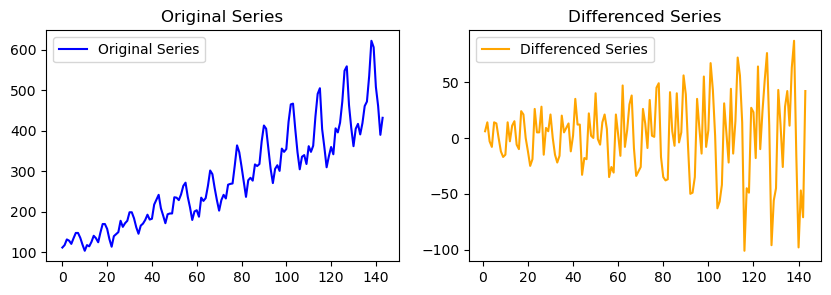

In [148]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

flights['passengers'].plot(ax=axes[0], color='blue', label='Original Series')

flights['passengers'].diff(1).plot(ax=axes[1], color='orange', label='Differenced Series')
axes[0].set_title('Original Series')
axes[1].set_title('Differenced Series')
axes[0].legend()
axes[1].legend()


### Logarithmic Transform

Taking the log of a series is another common transformation, primarily used to stabilize the variance of a series and convert multiplicative relationships into additive ones.

The log transformation basically replaces each observation $Y_t$ in a time series with its logarithm.

The transformation is defined as:

$$Y'_t = \ln(Y_t)$$

where $Y_t$ is the original value of the time series at time $t$, and $Y'_t$ is the transformed value. Note that this requires that all $Y_t > 0$.

#### Considerations

Here are some of the considerations that should be taken into account when applying this transformation:

- **Positive Data Requirement**: The logarithm is only defined for positive values. If the time series $Y_t$ contains zero or negative values, a direct log transformation cannot be applied. 

- **Choice of Log Base**: While the natural logarithm ($\ln$) is common, other bases (base 10, base 2, etc) can be used.

- **Interpretation**: If models are fitted to the log-transformed data ($Y'_t$), forecasts will also be in the log scale ($\hat{Y}'_t$). To obtain forecasts for the original scale ($\hat{Y}_t$), a back-transformation is necessary.


#### Implementation

We can easily take the log of an array, series or dataframe using Numpy library's .log() function.

```python
# Example
import numpy as np
df["example_Log"] = np.log(df["example"])
```

Below is the log transformed flight dataset:

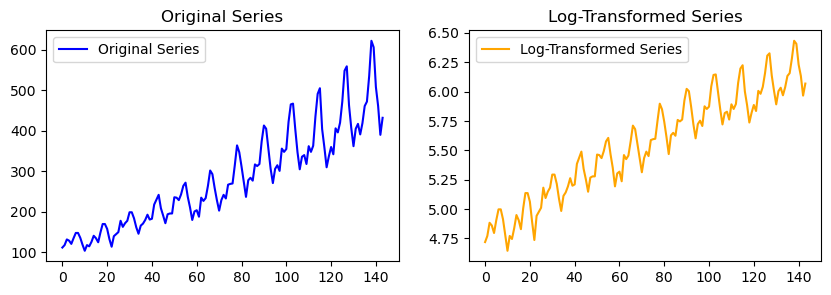

In [187]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

flights['passengers'].plot(ax=axes[0], color='blue', label='Original Series')

np.log(flights['passengers']).plot(ax=axes[1], color='orange', label='Log-Transformed Series')


axes[0].set_title('Original Series')
axes[1].set_title('Log-Transformed Series')

axes[0].legend()
axes[1].legend()


### Logarithmic and Difference Transform

The goal of this combined operation is to produce a series that is more stationary in both its variance and its mean. Since we already covered both transformations individually, just keep in mind that this composition can have both its advantages but also it's drawbacks, such as the necessity that all data is greater than zero, and if it is modeled, the forecast results have to be back-transformed.

#### Implementation

We first take the log, then we differentiate it. This order is to prevent that we log transform negative or zero values.

```python
# Take the difference and log and plot it
df["example_diff_log"] = np.log(df["example"]).diff()
```

Below is this composition transformed flight dataset:

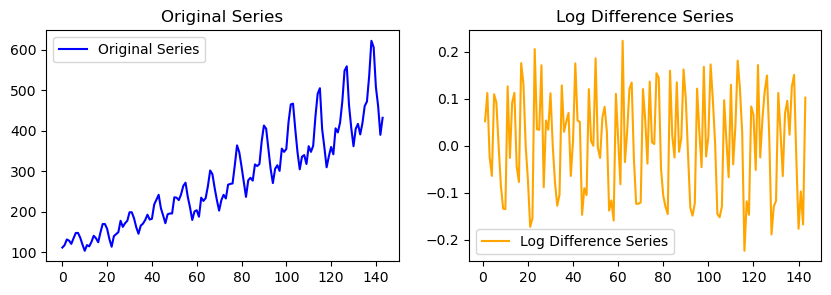

In [152]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

flights['passengers'].plot(ax=axes[0], color='blue', label='Original Series')

np.log(flights['passengers']).diff().plot(ax=axes[1], color='orange', label='Log Difference Series')

axes[0].set_title('Original Series')
axes[1].set_title('Log Difference Series')

axes[0].legend()
axes[1].legend()


### Detrending by model fitting

Another approach to address underlying trends is to create a model specifically for the trend underlying the data, and then subtract it from the series. Different models can be used, such as linear regression, polynomial curves or even more complex models. The resulting series of residuals ideally no longer exhibits the trend, making it more stationary than before.

In the following example, a simple linear fit is used to model the additive term from the data:

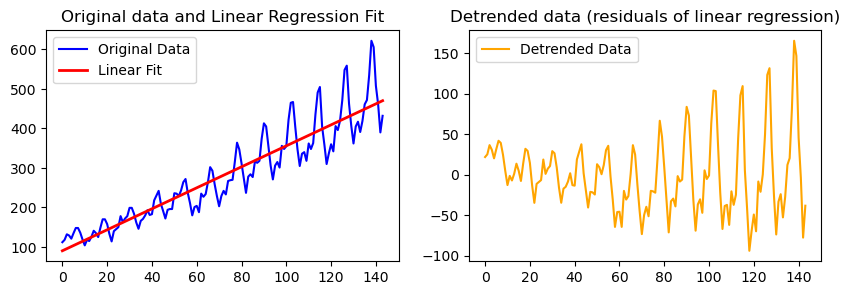

In [ ]:
from sklearn.linear_model import LinearRegression

# Fit a linear regression model
X = np.arange(len(flights)).reshape(-1, 1)
y = flights['passengers'].values
model = LinearRegression()
model.fit(X, y)
preds = model.predict(X)

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

# Plot original data and linear regression fit
flights['passengers'].plot(ax=axes[0], color='blue', label='Original Data')
axes[0].plot(flights.index, preds, color='red', linewidth=2, label='Linear Fit')
axes[0].set_title('Original data and Linear Regression Fit')

# Plot detrended data
detrended = flights['passengers'] - preds
detrended.plot(ax=axes[1], color='orange', label='Detrended Data')
axes[1].set_title('Detrended data (residuals of linear regression)')

axes[0].legend()
axes[1].legend()


### Detrending with Moving Average

A moving average (MA), also known as a rolling mean, is the average of a subset of data within a window of size N, that "rolls" sequentially through the data. This averaging smooth out short-term vluctuations, highlighting longer-term trends in the data. By subtracting a MA from our time series, we minimize the presence of long germ trends in it.

There are different MAs, such as:

- Simple Moving Average (SMA): where all data points in the window are weighted equally.
- Weighted Moving Average (WMA): Assigns more weight to recent data points, assuming they are more relevant.
- Exponential Moving Average (EMA): Also gives more weight to recent data, but the weights decrease exponentially for older data points. It's more responsive to recent changes than an SMA.


<Axes: >

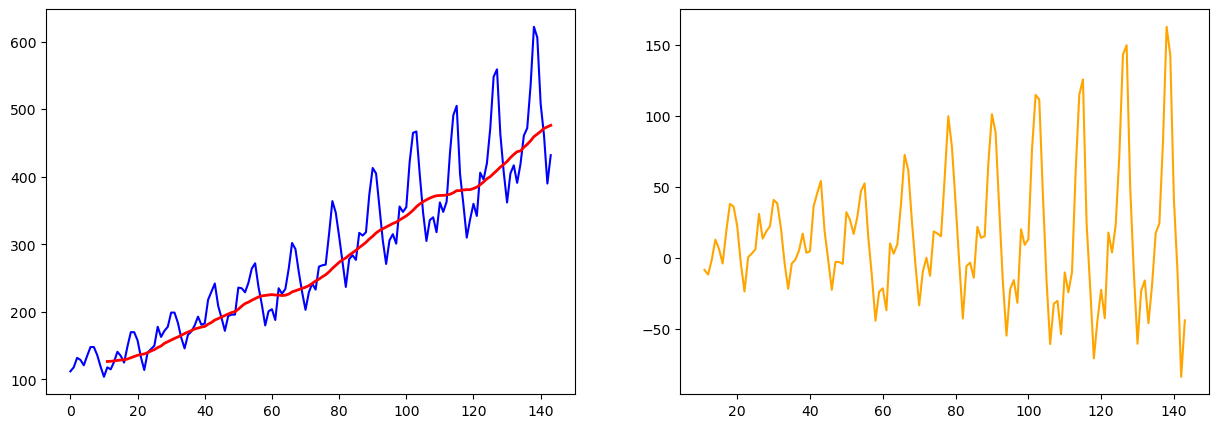

In [174]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# calculate rolling mean
rolling_mean = flights['passengers'].rolling(window=12).mean()

flights['passengers'].plot(ax=axes[0], color='blue')
# plot rolling mean
axes[0].plot(rolling_mean.index, rolling_mean, color='red', linewidth=2)


# plot detrended data
detrended = flights['passengers'] - rolling_mean
detrended.plot(ax=axes[1], color='orange')

<br><br><br><br><br><br>
<br><br><br><br><br><br>
<br><br><br><br><br><br>

## 4️⃣ Conclusion

Overall, understanding stationarity is vital to know how to approach the data. If the data is non-stationary, then certain transforms may help turn it into stationary data. The difference or logarithmic transforms are common techniques to make data stationarity. One method is not better than the other. The user needs to look at all methods and see each result before making a sound judgment. Using quantitative tools such as the ADF Test can give us a proper understanding of the properties of our data.

(from Why Does Stationarity Matter in Time Series Analysis?)

---



## Conclusion

In this article we have described what a stationary time series is and how you can apply various transforms to make your data stationary. The log transform helps to stabilise the variance and the difference transfom stabilises the mean. We can then test for stationarity using the ADF test. The main importance of stationarity is that most forecasting models assume that the data holds that property. In my next article we will cover one of these forecasting models.

The full code that generated the data, plots and ADF test in this post can be viewed here:

LINK

## References and Further Reading

- Forecasting: Principles and Practice: https://otexts.com/fpp2/
- ADF Test: https://www.machinelearningplus.com/time-series/augmented-dickey-fuller-test/
- Hypothesis Testing: https://towardsdatascience.com/z-test-simply-explained-80b346e0e239


(from Stationarity For Time Series)


---

## Summary

In time series forecasting, a time series, which has constant statistical properties (mean, variance, and covariance) and thus is independent of time, is described as stationary.

Because of the constant statistical characteristics, a stationary time series is easier to model than a non-stationary time series. Thus, a lot of time series forecasting models assume stationarity.

Stationarity can be checked either by visual assessment or by a statistical approach. The statistical approach checks for a unit root, an indicator of non-stationarity. The two most popular unit root tests are ADF and KPSS. Both are available in the Python stattools library [8,9].

If a time series is non-stationary, you can try to make it stationary by differencing, log transforming, or removing the trend.

## Dataset

All datasets are taken from the fma R package.

[1] Hyndman RJ (2023). fma: Data sets from “Forecasting: methods and applications” by Makridakis, Wheelwright & Hyndman (1998). R package version 2.5, http://pkg.robjhyndman.com/fma/.

License: GPL-3 (https://cran.r-project.org/web/packages/fma/index.html)

## References

[2] Dickey, D. A. and Fuller, W. A. (1979). Distribution of the estimates for autoregressive time series with a unit root. J. Am. Stat. Assoc. 74, 427–431.

[3] R. J. Hyndman, & G. Athanasopoulos (2021) Forecasting: principles and practice, 3rd edition, OTexts: Melbourne, Australia. OTexts.com/fpp3 . (Accessed on September 26, 2022).

[4] Kwiatkowski, D., Phillips, P. C., Schmidt, P., & Shin, Y. (1992). Testing the null hypothesis of stationarity against the alternative of a unit root: How sure are we that economic time series have a unit root?. Journal of econometrics, 54(1–3), 159–178.

[5] D. C. Montgomery, C. L. Jennings, Murat Kulahci (2015) Introduction to Time Series Analysis and Forecasting, 2nd edition, John Wiley & Sons.

[6] PennState (2023). S.3 Hypothesis Testing (Accessed on September 26, 2022).

[7] statsmodels (2023). Stationarity and detrending (ADF/KPSS) (Accessed on March 10, 2023).

[8] statsmodels (2023). statsmodels.tsa.stattools.adfuller (Accessed on September 26, 2022).

[9] statsmodels (2023). statsmodels.tsa.stattools.kpss (Accessed on September 26, 2022).

from (Stationarity in Time Series — A Comprehensive Guide)

---


## Conclusion

And there you have it — everything you should know about stationarity. The whole concept will get clearer in a couple of articles when you start with modeling and forecasting. For now, remember that a stationary process is easier to analyze and is required by most forecasting models.

There’s still a couple of things left to cover before forecasting. These include train/test splits, metrics, and evaluations. All of these will be covered in the next article, so stay tuned.

<br><br><br><br><br><br><br><br><br><br><br><br><br><br>

# Prompt:

Is it better to check for seasonality first and then decompose the time series, and later to check for stationarity and try to fix it (if the time series is still stationary), or the contraty (check first for stationarity, process data and then seasonality check)? Justify yourself

# Claude:

The better approach is:

1. Check for seasonality and decompose the time series first
2. Then check for stationarity and apply transformations if needed

Checking seasonality first is preferable for several important reasons:

1. **Proper identification of components**: Decomposing first allows you to separate the time series into its constituent parts (trend, seasonality, and residuals), giving you a clearer picture of the underlying patterns.

2. **More accurate stationarity assessment**: By first identifying and removing seasonal patterns, you can more accurately assess stationarity on the deseasonalized data. Seasonality can mask true stationarity properties.

3. **Better transformation selection**: Understanding the seasonal patterns helps determine which transformations might be most appropriate later (e.g., seasonal differencing vs. regular differencing).

5. **Enhanced model selection**: Knowing the seasonal characteristics upfront guides your choice of appropriate models (e.g., SARIMA vs. ARIMA).

